<a href="https://colab.research.google.com/github/bcallen95/UNH-QC-Tutorials/blob/main/dynamics_tutorial_v.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Install Libraries**

In [ ]:
!pip install qutip
!pip install qiskit --quiet
!pip install git+https://github.com/oseledets/ttpy.git --quiet
!sed --i -e 's/np.object/object/g' /usr/local/lib/python3.10/dist-packages/tt/multifuncrs.py
!sed --i -e 's/np.object/object/g' /usr/local/lib/python3.10/dist-packages/tt/multifuncrs2.py
!sed --i -e 's/np.complex/complex/g' /usr/local/lib/python3.10/dist-packages/tt/core/vector.py
!sed --i -e 's/np.complex/complex/g' /usr/local/lib/python3.10/dist-packages/tt/core/matrix.py
!sed --i -e 's/np.float/float/g' /usr/local/lib/python3.10/dist-packages/tt/core/vector.py
!sed --i -e 's/np.int/int/g' /usr/local/lib/python3.10/dist-packages/tt/optimize/tt_min.py
!pip install strawberryfields
!pip install pylatexenc --quiet
!pip install --upgrade numpy==1.23

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 59.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 46.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 55.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 13.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 35.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.0/48.0 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.7/94.7 kB 1

## **Quantum dynamics simulations with qutip, soft and qiskit**

### **Qutip simulation: harmonic oscillator**

#### Install qutip

In [ ]:
import qutip as qt
from qutip import *
import matplotlib.pyplot as plt

%matplotlib inline
from IPython.display import Image

from pylab import *
import matplotlib as mpl
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D

import imageio
import matplotlib.image as mpimg

import matplotlib.pyplot as plt
from matplotlib import cm, animation
from mpl_toolkits.mplot3d import Axes3D
from base64 import b64encode
from IPython.display import HTML

import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('retina')
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['figure.dpi'] = 100

import numpy as np
import qutip as qt
from qutip import about, basis, destroy, mesolve, ptrace, qeye, tensor, wigner, Qobj

/usr/local/lib/python3.10/dist-packages/qutip/__init__.py:65: UserWarning: The new version of Cython, (>= 3.0.0) is not supported.
  warnings.warn(


#### Propagation in the Fock representation

In [ ]:
xo = 0.75
po = 1.75
xmin = -5.0
xmax = 5.0
N = 64                                                          # Define # of states to include in basis
a = qt.destroy(N)                                               # Define annihilation operator
n = qt.num(N)                                                   # Define number operator
#x = (a + a.dag())/np.sqrt(2.0)                                  # position operator in terms of creation and annihilation operators
#p = -1.j * (a - a.dag())/np.sqrt(2.0)                           # momentum operator in terms of creation and annihilation operators
m = 1                                                           # mass = 1.0
hbar = 1                                                        # hbar = 1.0
psi0 = qt.coherent(N, alpha=(xo+(po*1j))/np.sqrt(2))            # Define a coherent state with amplitude alpha
# psi1 = qt.coherent(N, alpha=-(xo+(po*1j))/np.sqrt(2))           # Define a coherent state with amplitude -alpha
# psi0 = psi0 + psi1
# psi0.unit(inplace=True)
omga = 1.0                                                      # omega = 1.0
H_ho = hbar*omga*(a.dag()*a + 1./2.)                            # Harmonic Oscillator Hamiltonian
tlist = np.linspace(0, 20, 1000)   # Define the list of times for which we calculate dynamics.
result = qt.mesolve(H_ho, psi0, tlist, [], [], progress_bar=True)

##### Inverse WT



Given the state $$\psi(x) = \left(\frac{\alpha}{\pi}\right)^{1/4}e^{-\frac{\alpha}{2}(x-x_0)^2+i p_0 x+i \phi_0},$$
with $\phi_0$ the phase of $\psi(x)=R(x)e^{i \phi(x)}$ at $x=0$,  we obtain the analytic expression of the Wigner transform, as follows:
\begin{equation}
W(x,p) = \frac{1}{2 \pi} \int_{-\infty}^{\infty} ds e^{i s p} \psi^*(x+\frac{s}{2}) \psi(x-\frac{s}{2}),\\
= \frac{1}{2 \pi} \left(\frac{\alpha}{\pi}\right)^{1/2} \int_{-\infty}^{\infty} ds e^{i s (p-p_0)} e^{-\frac{\alpha}{4}s^2}e^{-\alpha (x-x_0)^2},\\
=\frac{1}{\pi} e^{-\alpha (x-x_0)^2} e^{- \frac{1}{\alpha}(p-p_0)^2}.
\end{equation}

Note that the same Wigner transform is obtained regardless of the value of $\phi_0$.

Next, wWe show that the wavefunction can be obtained from the Wigner transform, as follows:
\begin{equation}
\psi(x) = \frac{1}{\psi(0)e^{-i 2 \phi_0}}\int_{-\infty}^\infty dp e^{i p x} W(\frac{x}{2},p),
\end{equation}
since
\begin{equation}
\psi(x) = \frac{\pi^{-1} e^{i p_0 x} e^{-\alpha (\frac{x}{2}-x_0)^2}}{\psi(0)e^{-i 2 \phi_0}}\int_{-\infty}^\infty dp e^{i (p-p_0) x} e^{- \frac{1}{\alpha}(p-p_0)^2},\\
= \frac{\pi^{-1}e^{i p_0 x}e^{-\alpha (\frac{x}{2}-x_0)^2}}{\psi(0)e^{-i 2 \phi_0}} e^{-\alpha \frac{x^2}{4}} \sqrt{\pi \alpha},\\
= \frac{\pi^{-1}e^{i p_0 x}e^{-\alpha (\frac{x}{2}-x_0)^2}}{\left(\frac{\alpha}{\pi}\right)^{1/4}e^{-\frac{\alpha}{2}x_0^2-i \phi_0}} e^{-\alpha \frac{x^2}{4}} \sqrt{\pi \alpha},\\
= \left(\frac{\alpha}{\pi}\right)^{1/4} e^{i p_0 x+i \phi_0}e^{-\alpha (\frac{x}{2}-x_0)^2+\frac{\alpha}{2}x_0^2}e^{-\alpha \frac{x^2}{4}},\\
= \left(\frac{\alpha}{\pi}\right)^{1/4} e^{i p_0 x+i \phi_0}e^{-\frac{\alpha}{2} (x^2+x_0^2-2 x_0 x)}.\\
\end{equation}
Therefore, it is clear that
\begin{equation}
\psi(x) e^{-i \phi_0} = \vert \psi(x)\vert  e^{i (\phi(x) - \phi_0)} = \frac{1}{\vert \psi(0) \vert}\int_{-\infty}^\infty dp e^{i p x} W(\frac{x}{2},p),
\end{equation}
with $\vert \psi(0) \vert^2 =  \int dx \vert \int_{-\infty}^\infty dp e^{i p x} W(\frac{x}{2},p)\vert^2$, since $\psi(x)$ is normalized.

In addtion, we can obtain the density, as follows:
\begin{equation}
\rho(x) = \int_{-\infty}^\infty dp W(x,p),\\
= \frac{1}{\pi} \sqrt{\pi \alpha} e^{-\alpha (x-x_0)^2}
\end{equation}

In [ ]:
dp = 2.0*np.pi/(xmax-xmin)*0.5
pv=np.arange(-N/2,N/2)*dp
dx=(xmax-xmin)/N
xvec=np.arange(-N/2,N/2)*dx

In [ ]:
# Conversion from Fock to coord representation by numerical inverse Wigner transform
def psirv(n):
  wt=wigner(result.states[n],xvec/2,pv)
  out=np.zeros(np.size(xvec),dtype=complex)
  for k in range(np.size(xvec)):
    out[k]=np.sum(dp*np.exp(1j*pv[:]*xvec[k])*wt[:,k])
  fo=np.sqrt(norm(out)**2*dx)
  return out/fo

###### Plot of $\psi(x)$

In [ ]:
plot(xvec,np.real(psirv(0)),'-o')
ref=np.exp(-(xvec-xo)**2/2+1j*po*xvec)/(np.pi)**0.25
plot(xvec,np.real(ref),'-')

### **Simulation of harmonic oscillator: qutip vs SOFT and matrix vector multiplication**

In [ ]:
# soft propagation
def soft(f,UV,UK):
  out=UV*f
  out=UK*np.fft.fft(out)
  out=UV*np.fft.ifft(out)
  return out

In [ ]:
# Define grids
#N=128
#xmin = -7.0
#xmax = 7.0
#xvec=np.zeros(N,dtype=float)
#dx=(xmax-xmin)/N
#xvec=np.arange(-N/2,N/2)*dx
dp = 2.0*np.pi/(xmax-xmin)
pv=np.zeros(N,dtype=float)

for i in range(N):
  pv[i]=dp*(i-N/2)
pv=np.fft.fftshift(pv)

In [ ]:
# Converstion of Fock state to coord representation by inverse Wigner transform
def F2C(fockstate):
  wt=wigner(fockstate,xvec/2,pv)
  out=np.zeros(np.size(xvec),dtype=complex)
  for k in range(np.size(xvec)):
    for j in range(np.size(pv)):
      out[k]+=dp*np.exp(1j*pv[j]*xvec[k])*wt[j,k]
  fo=np.sqrt(norm(out)**2*dx)
  return out/fo

In [ ]:
import scipy.linalg as la
from tqdm.notebook import trange # progress bar

#### Hamiltonian and propagators

In [ ]:
mass=1
# Integration time step
tau=tlist[1]-tlist[0]
EYE=1j

# Potential and kinetic energy Fock representation
Hm = hbar*omga*(a.dag()*a + 1./2.)
Hm=Hm.full()

# Propagator for Fock representation
Um=la.expm(-EYE*Hm*tau)

# Potential and kinetic energy Coord representation
VV=0.5*xvec**2
KE=pv**2/2/mass

# Trotter propagators in coord representation
UVx=np.exp(-EYE*VV*tau/2)
UKx=np.exp(-EYE*KE*tau)

# Initial State Coord representation
psi_c_init = psirv(0)
#psi_c_init = exp(-(xvec-(-1.))**2/2)/(np.pi)**0.25
psi_c=psi_c_init

# Initial State Fock representation
psi_c_initf = result.states[0]
psi_cf = psi_c_initf
psi_cf = psi_cf.full()
psi_cf = psi_cf.flatten()

####Propagation

In [ ]:
iterations=np.size(tlist)
psil=[]
psil2=[]
# for i in range(iterations-1):
n=iterations
n=899
for i in range(n):
  psil.append(psi_c)
  psi_c=soft(psi_c,UVx,UKx)
  psil2.append(psi_cf)
  psi_cf=np.dot(Um,psi_cf)

psi_list = np.asarray(psil)
psi_list2 = np.asarray(psil2)

#### Propagated state

In [ ]:
plt.figure(figsize=(8, 6))
Eo=0.5+0.5*(xo**2+po**2)

# Convert from Fock to coordinate representation (Weighted sum of Fock states)
pl2=psi_list2[n-1]
out=pl2[0]*fock(N,0)
for j in range(1,N):
  out+=pl2[j]*fock(N,j)
pl2 = F2C(out)
outq=psirv(n-1)

out_soft=psi_list[n-1]
Ra = out_soft[int(np.size(xvec)/2)]
phi3 = np.arctan2(np.imag(Ra),np.real(Ra))
out_soft*=exp(-1j*phi3)

# Comparison of qutip and soft
plt.rcParams["figure.figsize"] = [12.50, 6.50]
plt.plot(xvec,Eo+np.abs(out_soft),'-',label='abs, SOFT_coord')
plt.plot(xvec,Eo+np.real(pl2),'-o',label='real, Matvec_Fock')
plt.plot(xvec,Eo+np.real(out_soft),'-x',label='real, SOFT_coord')
plt.plot(xvec,Eo+np.real(outq),label='real, qutip')
plt.plot(xvec,VV,linewidth=3)
plt.grid()
leg = plt.legend(loc='upper right')
plt.ylim(0,3.5)
plt.show()

#### Eigenstates by Fourier transform

In [ ]:
def compute_eigenstate_QTED(psi_list, tlist, x_list, energy_of_interest, N=N, normalize=False):
    '''
    This function computes the eigenstate from an array of dynamics.
    psi_list: array of wavefunction snapshots with shape: (n_timesteps, n_xvals)
    tlist:  array of times that the snapshots correspond to
    x_list : x-grid used for computation (array)
    energy_of_interest: the energy associated with the eigenstate of interest
                        (ex: ground-state H.O. would be 0.5)
    '''
    from tqdm.notebook import trange
    d_t = tlist[1]-tlist[0]
    psi_out = np.zeros(len(psi_list[0]), dtype=complex)
    dx = x_list[1]-x_list[0]
    nts=len(psi_list)
    for ii in range(nts):
        psi_out += (d_t * np.exp(1j * energy_of_interest * tlist[ii])* psi_list[ii])
    return psi_out

In [ ]:
# Compute eigenstate at a desired energy:
plt.figure(figsize=(12, 4.5))
for i in range(8):
  psi_out = compute_eigenstate_QTED(psi_list, tlist, xvec, i+0.5)
  plt.plot(xvec, i+0.5+np.abs(psi_out)/norm(psi_out),'blue')
  plt.plot(xvec,(i+0.5)*(xvec+.1)/(xvec+.1),'black')
plt.plot(xvec,xvec*xvec*0.5)
plt.ylim(0,8)
plt.grid()

#### Visualization

In [ ]:
xvec = np.linspace(xmin, xmax, N)
X, Y = np.meshgrid(xvec, xvec)

In [ ]:
cb = None

def plot_result(result, n, fig=None, axes=None):
    global cb
    xmin = -5
    xmax = 5
    axes.cla()

    W = wigner(result.states[n], xvec, xvec)

    surf = axes.plot_surface(X, Y, W, rstride=1, cstride=1, cmap=cm.jet,
                              alpha=0.75, linewidth=0.05, vmax=0.25, vmin=-0.25)
    axes.contour(X, Y, W, 10, cmap="RdYlGn", linestyles="solid", offset=-0.17)
    axes.set_xlim3d(xmin, xmax)
    axes.set_ylim3d(xmin, xmax)
    axes.set_zlim3d(-0.25, 0.25)
    if not cb:
        cb = plt.colorbar(surf, shrink=0.65, aspect=20)
    return axes.artists


def update(n):
    return plot_result(result, n, fig=fig, axes=ax)

In [ ]:
name = 'Test-Surface-Animation'
# Set-up the figure
fig = plt.figure(figsize=(8, 4), dpi=100)
# Create 3D axes, add to figure
ax = Axes3D(fig, azim=-107, elev=29)
fig.add_axes(ax, projection='3D')
# Create animation object and run routine to save to a .mp4 file
anim = animation.FuncAnimation(fig, update, frames=len(result.times), blit=True)
anim.save(name + '.mp4', fps=10, writer="ffmpeg", codec=None)
plt.close(fig)

In [ ]:
# Open Video and display in notebook by converting to HTML with base64
video = open(name + '.mp4', "rb").read()
video_encoded = b64encode(video).decode("ascii")
video_tag = '<video controls src="data:video/x-m4v;base64,{0}" height=720px>'.format(video_encoded) # Set the height to rescale the output.
HTML(video_tag)

###### Plot of $\rho(p)$

In [ ]:
out=dx*np.sum(wigner(result.states[0],xvec,pv),axis=1)
plot(pv,out)
plot(pv,exp(-(pv-po)**2)/np.sqrt(np.pi),'-o')

### **Simulation of Kerr-cat oscillator: qutip, qiskit, strawberryfields**

##### Hamiltonian and propagation

In [ ]:
occ=16
r=0.05
zeta=4
#z=-2*zeta*r*1j
crea=create(occ)
dest=destroy(occ)

numoc=crea*dest
ham=numoc*(numoc-qutip.qeye(occ))-zeta*(crea**2+dest**2)
ham=ham*r

#k=5
psi0=fock(occ)
#H_ho = hbar*omga*(a.dag()*a + 1./2.)                            # Harmonic Oscillator Hamiltonian
tlist = np.linspace(0, 10, 200)   # Define the list of times for which we calculate dynamics.
result2 = qt.mesolve(ham, psi0, tlist, [], [], progress_bar=True)

10.0%. Run time:   0.01s. Est. time left: 00:00:00:00
20.0%. Run time:   0.01s. Est. time left: 00:00:00:00
30.0%. Run time:   0.01s. Est. time left: 00:00:00:00
40.0%. Run time:   0.02s. Est. time left: 00:00:00:00
50.0%. Run time:   0.03s. Est. time left: 00:00:00:00
60.0%. Run time:   0.03s. Est. time left: 00:00:00:00
70.0%. Run time:   0.04s. Est. time left: 00:00:00:00
80.0%. Run time:   0.04s. Est. time left: 00:00:00:00
90.0%. Run time:   0.05s. Est. time left: 00:00:00:00
Total run time:   0.05s


##### Obtain $\psi(x)$ from inverse Wigner transform

In [ ]:
# Numerical inverse Wigner transform
def psirv2(n):
  wt=wigner(result2.states[n],xvec/2,pv)
  out=np.zeros(np.size(xvec),dtype=complex)
  for k in range(np.size(xvec)):
    for j in range(np.size(pv)):
      out[k]+=dp*np.exp(1j*pv[j]*xvec[k])*wt[j,k]
  fo=np.sqrt(norm(out)**2*dx)
  return out/fo
plot(xvec,np.real(psirv2(150)),'-o')
ref=np.exp(-(xvec-xo*0)**2/2+1j*0*po*xvec)/(np.pi)**0.25
plot(xvec,np.real(ref),'-')

##### Plot of $\rho(x)$

In [ ]:
out=dp*np.sum(wigner(result.states[0],xvec,pv),axis=0)
plot(xvec,out)
plot(xvec,exp(-(xvec-xo)**2)/np.sqrt(np.pi),'-o')

##### Movie of Wigner function

In [ ]:
cb = None

def plot_result(res, n, fig=None, axes=None):
    global cb
    xmin = -5
    xmax = 5
    axes.cla()

    W = wigner(res.states[n], xvec, xvec)
    surf = axes.plot_surface(X, Y, W, rstride=1, cstride=1, cmap=cm.jet,
                              alpha=0.75, linewidth=0.05, vmax=0.25, vmin=-0.25)
    axes.contour(X, Y, W, 10, cmap="RdYlGn", linestyles="solid", offset=-0.17)
    axes.set_xlim3d(xmin, xmax)
    axes.set_ylim3d(xmin, xmax)
    axes.set_zlim3d(-0.25, 0.25)
    if not cb:
        cb = plt.colorbar(surf, shrink=0.65, aspect=20)
    return axes.artists


def update(n):
#    global result2
    return plot_result(result2, n, fig=fig, axes=ax)

In [ ]:
name = 'Test-Surface-Animation'
# Set-up the figure
fig = plt.figure(figsize=(8, 4), dpi=100)
# Create 3D axes, add to figure
ax = Axes3D(fig, azim=-107, elev=29)
fig.add_axes(ax, projection='3D')
# Create animation object and run routine to save to a .mp4 file
anim = animation.FuncAnimation(fig, update, frames=len(result2.times), blit=True)
anim.save(name + '.mp4', fps=10, writer="ffmpeg", codec=None)
plt.close(fig)

In [ ]:
# Open Video and display in notebook by converting to HTML with base64
video = open(name + '.mp4', "rb").read()
video_encoded = b64encode(video).decode("ascii")
video_tag = '<video controls src="data:video/x-m4v;base64,{0}" height=720px>'.format(video_encoded) # Set the height to rescale the output.
HTML(video_tag)



#### **Simulation with qiskit (CV simulated with qubits, quantics Fock basis)**

Given the Hamiltonian matrix in the Fock basis, generated with qutip, convert it into a DV circuit and exponentiate it to build the propagator

####Import qiskit

In [ ]:
from qiskit import *
import numpy as np
from matplotlib import pyplot as plt
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import QFT
import pylatexenc

from qiskit.visualization import plot_state_city, plot_bloch_multivector
from qiskit.visualization import plot_state_paulivec, plot_state_hinton
from qiskit.visualization import plot_state_qsphere
from qiskit.quantum_info.operators import Operator
from qiskit import QuantumCircuit, QuantumRegister
#import prepare_MPS as mps
from qiskit import BasicAer, execute
import matplotlib
from matplotlib import axes
import itertools
import scipy.linalg as spLA
import matplotlib.pyplot as plt
from tqdm.notebook import trange
np.set_printoptions(linewidth=110)

from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import BasicAer, execute
from qiskit.compiler import transpile
from qiskit.opflow import X, Y, Z, I, One, Zero, PauliOp, PauliSumOp, Suzuki
from qiskit.opflow.evolutions import PauliTrotterEvolution
from qiskit.quantum_info.operators import Operator, Pauli
from qiskit.quantum_info import process_fidelity
from qiskit.extensions import RXGate, XGate, CXGate
from qiskit.circuit import Parameter

#### Brandon's utility functions to convert unitary matrix into sum of products of Pauli matrices

In [ ]:
def vec_query(arr, my_dict):
    '''
    This function vectorizes dictionary querying, allowing us to query `my_dict` with a np.array `arr` of keys.
    '''

    return np.vectorize(my_dict.__getitem__, otypes=[tuple])(arr)

def nested_kronecker_product(a):
    '''
    Handles Kronecker Products for list (i.e.,  a = [Z, Z, Z] will evaluate Z ⊗ Z ⊗ Z)
    '''
    if len(a) == 2:
            return np.kron(a[0],a[1])
    else:
        return np.kron(a[0], nested_kronecker_product(a[1:]))

def Hilbert_Schmidt(mat1, mat2):
    # |ψ1> and |ψ2>: <ψ1*|ψ2> for <ψ1|*
    return np.trace(mat1@ mat2)

def decompose(H, verbose=False):
    #define the four Pauli-matrices in a dictionary:
    pms = { 'I': np.array([[1, 0], [0, 1]], dtype=complex),
             'X': np.array([[0, 1], [1, 0]], dtype=complex),
             'Y': np.array([[0, -1j], [1j, 0]], dtype=complex),
            'Z': np.array([[1, 0], [0, -1]], dtype=complex)}
    if verbose:
        print('Terms of the Operator:\n')
    pauli_keys = list(pms.keys()) # Grab Matrix Names for printing
    nqb = int(np.log2(H.shape[0])) # Get the number of qubits needed for our pauli strings
    output_string = ''
    sigma_combinations = list(itertools.product(pauli_keys, repeat=nqb))    # Gives all possible combinations of nqb Pa

    for ii in trange(len(sigma_combinations)):
        name = sigma_combinations[ii][0]
        for ll in range(1, len(sigma_combinations[ii])):
            name = name + '⊗' + sigma_combinations[ii][ll]
        alt_name = ''.join(sigma_combinations[ii]) # For tequila compatibility
        a_ij = (1/(2**nqb)) * Hilbert_Schmidt(nested_kronecker_product(vec_query(np.array(sigma_combinations[ii]), pms)), H)
        # If the Hilbert-Schmidt Product doesn't reduce to 0
        if a_ij != 0.0:
            if abs(a_ij) < 1e-10:
                pass
            else:
                if verbose:
                    print(np.round(a_ij.real, 6),'', name)
                output_string += str(np.round(a_ij.real, 6))+'*'+alt_name
                output_string += '+'
    return output_string[:-1] # To ignore that extra plus sign


def build_pauli_dict(decomposed_operator):
    single_terms = decomposed_operator.split('+')
    pauli_dict_out = {}
    for term in single_terms:
        coeff, pauli_str = term.split('*')
        pauli_dict_out[pauli_str] = float(coeff)
    return pauli_dict_out


def pauli_strings_2_pauli_sum(operator):
    tmp_pauli_dict = build_pauli_dict(operator)
    # Convert the dict to a list of tuples of the form [('Pauli String', float_coeff), ...]
    tmp_pauli_list = list(zip(tmp_pauli_dict.keys(), tmp_pauli_dict.values()))
    # Construct a qiskit PauliSumOp from this list
    tmp_pauli_sum = PauliSumOp.from_list(tmp_pauli_list)
    return tmp_pauli_sum

In [ ]:
decomposed_xmd = decompose(ham.full(), verbose=False)
circ_h = pauli_strings_2_pauli_sum(decomposed_xmd)
time_step = Parameter('t')
U_h = (time_step*circ_h).exp_i()
tU_h = PauliTrotterEvolution(trotter_mode=Suzuki(order=2, reps=1)).convert(U_h)

  0%|          | 0/256 [00:00<?, ?it/s]

<ipython-input-11-14d28420c87f>:5: DeprecationWarning: The class ``qiskit.opflow.evolutions.trotterizations.suzuki.Suzuki`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/opflow_migration.
  tU_h = PauliTrotterEvolution(trotter_mode=Suzuki(order=2, reps=1)).convert(U_h)
<ipython-input-11-14d28420c87f>:5: DeprecationWarning: The class ``qiskit.opflow.evolutions.pauli_trotter_evolution.PauliTrotterEvolution`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/opflow_migration.
  tU_h = PauliTrotterEvolution(trotter_mode=Suzuki(order=2, reps=1)).convert(U_h)


#### Circuit parameters

In [ ]:
xmin = -7.0
xmax = 7.0
N = 128

dp = 2.0*np.pi/(xmax-xmin)*0.5
pv=np.arange(-N/2,N/2)*dp
dx=(xmax-xmin)/N
xvec=np.arange(-N/2,N/2)*dx


X, Y = np.meshgrid(xvec, xvec)
global psin,qc2
tlist = np.linspace(0, 10, 200)
dt=(tlist[1]-tlist[0])

# circuit for one propagation step
qc2=tU_h.bind_parameters({time_step: dt})
#initial state
d=4
n=2**d
psi0=fock(n)
psin=psi0.full()
psin=psin.flatten()

#### Quantum circuit for time-sliced propagation

In [ ]:
def qsolve():
  global psin,qc2
  n=np.size(psin)
  d=int(np.log2(np.size(psin)))
  # Circuit
  qre = QuantumRegister(d)
  circ = QuantumCircuit(qre)
  circ.initialize(psin,qre)
  circ.barrier()
  circ.append(qc2, qre)
  circ.barrier()
  # Execution
  psin = execute(circ, backend=BasicAer.get_backend('statevector_simulator')).result()
  psin = psin.get_statevector()
  # Weighted sum of Fock states
  out=psin[0]*fock(n,0)
  for j in range(1,n):
    out+=psin[j]*fock(n,j)
  return out

#### Visualization of final state from Wigner function

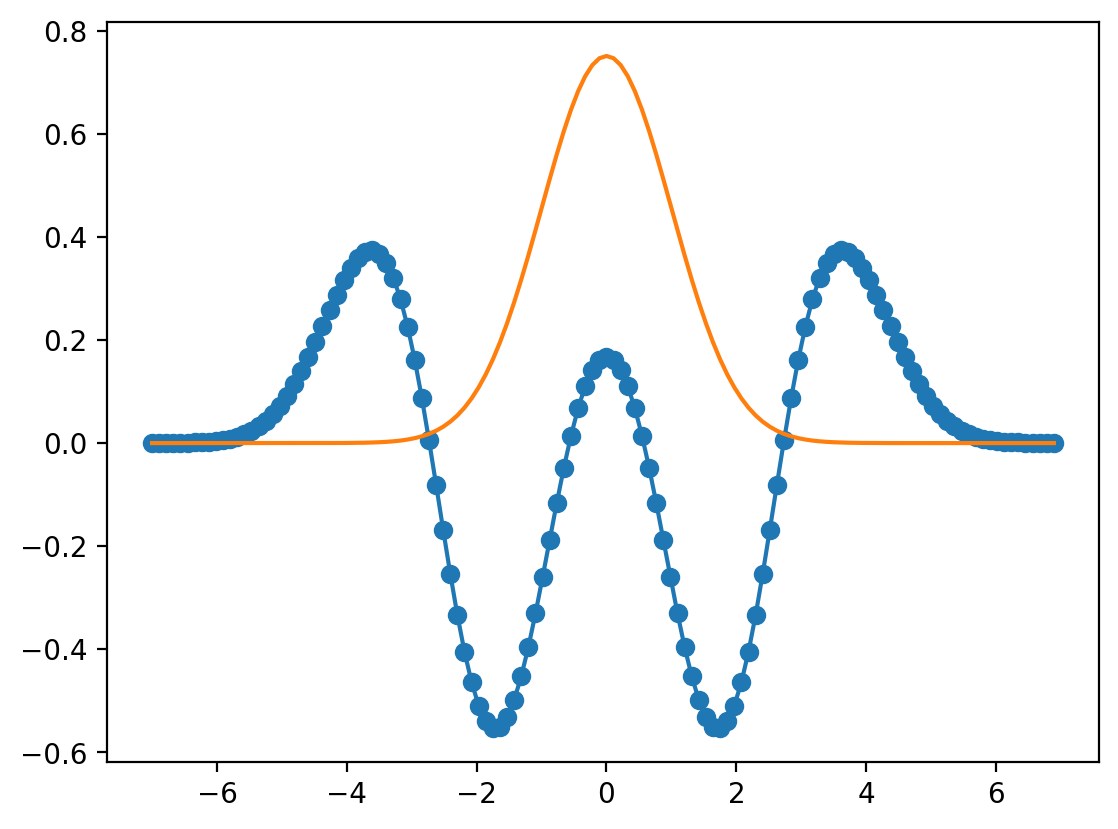

In [ ]:
# Numerical inverse Wigner transform
def psirv3(n):
  for j in range(n):
    pstate=qsolve()
  wt=wigner(pstate,xvec/2,pv)
  out=np.zeros(np.size(xvec),dtype=complex)
  for k in range(np.size(xvec)):
    for j in range(np.size(pv)):
      out[k]+=dp*np.exp(1j*pv[j]*xvec[k])*wt[j,k]
  fo=np.sqrt(norm(out)**2*dx)
  return out/fo

plot(xvec,np.real(psirv3(150)),'-o')

ref=np.exp(-xvec**2/2)/(np.pi)**0.25
plot(xvec,np.real(ref),'-')

#### Movie of Wigner function

In [ ]:
cb = None

def plot_result3(k,fig=None, axes=None):
    global cb
    xmin = -5
    xmax = 5
    axes.cla()

    W = wigner(qsolve(), xvec, xvec)
    surf = axes.plot_surface(X, Y, W, rstride=1, cstride=1, cmap=cm.jet,
                              alpha=0.75, linewidth=0.05, vmax=0.25, vmin=-0.25)
    axes.contour(X, Y, W, 10, cmap="RdYlGn", linestyles="solid", offset=-0.17)
    axes.set_xlim3d(xmin, xmax)
    axes.set_ylim3d(xmin, xmax)
    axes.set_zlim3d(-0.25, 0.25)
    if not cb:
        cb = plt.colorbar(surf, shrink=0.65, aspect=20)
    return axes.artists

def update3(k):
    return plot_result3(k,fig=fig, axes=ax)

In [ ]:
name = 'Test-Surface-Animation'
# Set-up the figure
fig = plt.figure(figsize=(8, 4), dpi=100)
# Create 3D axes, add to figure
ax = Axes3D(fig, azim=-107, elev=29)
fig.add_axes(ax, projection='3D')
# Create animation object and run routine to save to a .mp4 file
anim = animation.FuncAnimation(fig, update3, frames=200, blit=True)
anim.save(name + '.mp4', fps=10, writer="ffmpeg", codec=None)
plt.close(fig)

In [ ]:
# Open Video and display in notebook by converting to HTML with base64
video = open(name + '.mp4', "rb").read()
video_encoded = b64encode(video).decode("ascii")
video_tag = '<video controls src="data:video/x-m4v;base64,{0}" height=720px>'.format(video_encoded) # Set the height to rescale the output.
HTML(video_tag)

### **Simulation with Strawberryfields, CV circuit**

In [ ]:
import strawberryfields.decompositions
from strawberryfields.decompositions import *
import strawberryfields as sf
from strawberryfields import ops
from strawberryfields.ops import *

In [ ]:
sf.Program(1)

We consider the Kerr-cat Hamiltonian introduced by Eq. (1) of the manuscript titled [Spectral kissing and its dynamical consequences in the squeezed Kerr-nonlinear oscillator
](http://ursula.chem.yale.edu/~batista/NSF_CenterQuantumDynamics_ModularQuantumDevices/publications/publications_pdf_files/spectral_kissing_dynamics_squeezed_Kerr_oscillator.pdf):

 $$\frac{\hat{H}}{\hbar K_{err}} = \hat{n} (\hat{n}-1) - \zeta (\hat{a}^2+{\hat{a}^\dagger}^2)$$ with $\zeta=\frac{\epsilon}{K_{err}}=4$ and $\frac{K_{err}}{2 \pi}= 0.32~\text{MHz}$.

For a small time-step $\tau=t/(\hbar K_{err})$, we approximate the time-evolution operator, as follows:
$$e^{-\frac{i}{\hbar} H \tau} \approx \left[e^{-\frac{i t}{\hbar k} \hat{n}^2} e^{\frac{i t}{\hbar k} \hat{n}} e^{\frac{i \zeta t}{\hbar k} ({\hat{a}^\dagger}^2+\hat{a}^2)} \right]^k + \mathcal{O}(t^2/k)$$.

Therefore, $$e^{-\frac{i}{\hbar} H \tau} \approx [K(-r) R(r)S(z)]^k + \mathcal{O}(t^2/k),$$

Here, $R(r) = e^{i r \hat{n}}$, and $K(-r) = e^{-i r \hat{n}^2}$, with $r=\frac{t}{\hbar k}$, while  $S(z) = e^{(z^* \hat{a}^2 - z {\hat{a}^\dagger}^2)/2}$, with $z=-i r 2 \zeta = \vert z \vert e^{i \phi}$ where $\vert z \vert = r 2 \zeta$ and $\phi = - \pi/2$.

In [ ]:
def split_rho(k):
  prog = sf.Program(1)

  r = 0.05*10/200
  zeta = 4
  z = -2*zeta*r*1j

  with prog.context as q:
    # prepare the initial state
    #Fock(2) | q[0]
    #Dgate(1) | q[0]
    # Propagation
    for i in range(k):
      Sgate(z) | q[0]
      Rgate(r) | q[0]
      Kgate(-r) | q[0]
    # end circuit

  # run the engine
  eng = sf.Engine('fock', backend_options={"cutoff_dim": 10})
  state = eng.run(prog).state
  return state

**Husimi distribution**

The Husimi distribution is the Weierstrass transform of the Wigner distribution, as follows: $$Q(\alpha) = \frac{2}{\pi} \int W(\beta) e^{-2\vert \alpha -\beta \vert^2} d^2\beta$$

In [ ]:
# Gaussian Kernel to obtain the Husimi distribution as the Gaussian convolution of the Wigner transform
from scipy.signal import convolve2d
npt=100
X = np.linspace(-10, 10, npt)
P = np.linspace(-10, 10, npt)
state = split_rho(0)
W = state.wigner(0, X, P)
Kern = np.empty_like(W)
for i in range(np.size(X)):
  for j in range(np.size(P)):
    diff=np.abs((X[i]+1j*P[j])/np.sqrt(2))
    Kern[j,i]=np.exp(-2*diff**2)*(X[1]-X[0])*(P[1]-P[0])/np.pi

In [ ]:
cb = None

def plot_result2(n, fig=None, axes=None):
    global cb
    xmin = -5
    xmax = 5
    axes.cla()

    X = np.linspace(xmin, xmax, npt)
    P = np.linspace(xmin, xmax, npt)
    state = split_rho(n)
    W = state.wigner(0, X, P)

    # For Husimi distribution
    W = convolve2d(W,Kern, boundary='symm', mode='same')

    X, P = np.meshgrid(X, P)

    surf = axes.plot_surface(X, P, W, rstride=1, cstride=1, cmap=cm.jet,
                              alpha=0.75, linewidth=0.05, vmax=0.25, vmin=-0.25)
    axes.contour(X, P, W, 10, cmap="RdYlGn", linestyles="solid", offset=-0.17)
    axes.set_xlim3d(xmin, xmax)
    axes.set_ylim3d(xmin, xmax)
    axes.set_zlim3d(-0.25, 0.25)
    if not cb:
        cb = plt.colorbar(surf, shrink=0.65, aspect=20)
    return axes.artists


def update2(n):
    return plot_result2(n, fig=fig, axes=ax)

In [ ]:
name = 'Test-Surface-Animation2'
# Set-up the figure
fig = plt.figure(figsize=(8, 4), dpi=100)
# Create 3D axes, add to figure
ax = Axes3D(fig, azim=-107, elev=29)
fig.add_axes(ax, projection='3D')
# Create animation object and run routine to save to a .mp4 file
anim = animation.FuncAnimation(fig, update2, frames=200, blit=True)
anim.save(name + '.mp4', fps=10, writer="ffmpeg", codec=None)
plt.close(fig)

In [ ]:
# Open Video and display in notebook by converting to HTML with base64
video = open(name + '.mp4', "rb").read()
video_encoded = b64encode(video).decode("ascii")
video_tag = '<video controls src="data:video/x-m4v;base64,{0}" height=720px>'.format(video_encoded) # Set the height to rescale the output.
HTML(video_tag)

## **1-D Classical SOFT propagation**

In [ ]:
'''constants'''
N=500 #grid points
hbar=1 #reduced plancks constant
dt=0.5 #delta t
m=1 #mass in au

'''spatial grid'''
xMin=0
xMax=500
x=np.linspace(xMin, xMax, N)

'''momentum grid'''
p=np.arange(-N/2, N/2)*((2*np.pi*hbar)/(N*((xMax-xMin)/(N-1))))

'''wavefunction: guassian wavepacket'''
k0=m/2 #initial momentum
x0=xMax/2 #initial position
sigma=(xMax-xMin)/30 #width
psi=(1/(sigma*np.sqrt(2*np.pi)))*np.exp(-.5*((x-x0)/sigma)**2)*np.exp(-1j*k0*x)

'''potential operator+propogator'''
Vhat=np.zeros_like(x) #nothing
Vhat[400:499]=1 #well between x=[400,499]
Vprop=np.exp(-1j*dt*Vhat/(2*hbar)) #half step

'''kinetic operator+propogator'''
That=p**2/(2*m)
Tprop=np.exp(-1j*dt*That/hbar)

'''function for one step of split operator method'''
def splitOperator(psi,Vprop=Vprop,Tprop=Tprop):
  psi*=Vprop #1/2 step of potential propagator
  psi_p=np.fft.fft(psi) #shift to momentum basis
  psi_p*=Tprop #kinetic propagator
  psi=np.fft.ifft(psi_p) #shift back to spatial basis
  psi*=Vprop #1/2 step of potential propagator
  return psi


In [ ]:
from matplotlib import animation, rc, pyplot as plt
from IPython.display import HTML
import numpy as np

'''animate'''
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()
plt.close()

### parameters for plot
ax.set_xlim(( 0, 500))
ax.set_ylim((-0.001, 0.001))

line, = ax.plot([], [], lw=2)
lineV, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    lineV.set_data([], [])
    return (line, lineV,)

def animate(i):
  global psi
  psi=splitOperator(psi)
  line.set_data(x, np.conj(psi)*psi)
  # lineV.set_data(x, Vhat)
  return(line, lineV,)

anim = animation.FuncAnimation(fig, animate, init_func=init,
                             frames=400, interval=10, blit=True)

# Note: below is the part which makes it work on Colab
rc('animation', html='jshtml')
anim

# Hamiltonian simulation with Qiskit

##SOFT Propagation

In [ ]:
!pip install numpy
!pip install qiskit
!pip install pylatexenc

In [ ]:
from qiskit import *
import numpy as np
from matplotlib import pyplot as plt
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import QFT
import pylatexenc

from qiskit.visualization import plot_state_city, plot_bloch_multivector
from qiskit.visualization import plot_state_paulivec, plot_state_hinton
from qiskit.visualization import plot_state_qsphere
from qiskit.quantum_info.operators import Operator
from qiskit import QuantumCircuit, QuantumRegister
#import prepare_MPS as mps
from qiskit import BasicAer, execute
import matplotlib
from matplotlib import axes

In [ ]:
import itertools
import scipy.linalg as spLA
import matplotlib.pyplot as plt
from tqdm.notebook import trange
np.set_printoptions(linewidth=110)

from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import BasicAer, execute
from qiskit.compiler import transpile
from qiskit.opflow import X, Y, Z, I, One, Zero, PauliOp, PauliSumOp, Suzuki
from qiskit.opflow.evolutions import PauliTrotterEvolution
from qiskit.quantum_info.operators import Operator, Pauli
from qiskit.quantum_info import process_fidelity
from qiskit.extensions import RXGate, XGate, CXGate
from qiskit.circuit import Parameter

In [ ]:
#------------ Utility Functions ------------#

def vec_query(arr, my_dict):
    '''
    This function vectorizes dictionary querying, allowing us to query `my_dict` with a np.array `arr` of keys.
    '''

    return np.vectorize(my_dict.__getitem__, otypes=[tuple])(arr)

def nested_kronecker_product(a):
    '''
    Handles Kronecker Products for list (i.e.,  a = [Z, Z, Z] will evaluate Z ⊗ Z ⊗ Z)
    '''
    if len(a) == 2:
            return np.kron(a[0],a[1])
    else:
        return np.kron(a[0], nested_kronecker_product(a[1:]))

def Hilbert_Schmidt(mat1, mat2):
    # |ψ1> and |ψ2>: <ψ1*|ψ2> for <ψ1|*
    return np.trace(mat1.conj().T * mat2)

def decompose(H, verbose=False):
    #define the four Pauli-matrices in a dictionary:
    pms = { 'I': np.array([[1, 0], [0, 1]], dtype=complex),
            # 'X': np.array([[0, 1], [1, 0]], dtype=complex),
#             'Y': np.array([[0, -1j], [1j, 0]], dtype=complex),
            'Z': np.array([[1, 0], [0, -1]], dtype=complex)}
    if verbose:
        print('Terms of the Operator:\n')
    pauli_keys = list(pms.keys()) # Grab Matrix Names for printing
    nqb = int(np.log2(H.shape[0])) # Get the number of qubits needed for our pauli strings
    output_string = ''
    sigma_combinations = list(itertools.product(pauli_keys, repeat=nqb))    # Gives all possible combinations of nqb Pa

    for ii in trange(len(sigma_combinations)):
        name = sigma_combinations[ii][0]
        for ll in range(1, len(sigma_combinations[ii])):
            name = name + '⊗' + sigma_combinations[ii][ll]
        alt_name = ''.join(sigma_combinations[ii]) # For tequila compatibility
        a_ij = (1/(2**nqb)) * Hilbert_Schmidt(nested_kronecker_product(vec_query(np.array(sigma_combinations[ii]), pms)), H)
        # If the Hilbert-Schmidt Product doesn't reduce to 0
        if a_ij != 0.0:
            if abs(a_ij) < 1e-10:
                pass
            else:
                if verbose:
                    print(np.round(a_ij.real, 6),'', name)
                output_string += str(np.round(a_ij.real, 6))+'*'+alt_name
                output_string += '+'
    return output_string[:-1] # To ignore that extra plus sign


def build_pauli_dict(decomposed_operator):
    single_terms = decomposed_operator.split('+')
    pauli_dict_out = {}
    for term in single_terms:
        coeff, pauli_str = term.split('*')
        pauli_dict_out[pauli_str] = float(coeff)
    return pauli_dict_out


def pauli_strings_2_pauli_sum(operator):
    tmp_pauli_dict = build_pauli_dict(operator)
    # Convert the dict to a list of tuples of the form [('Pauli String', float_coeff), ...]
    tmp_pauli_list = list(zip(tmp_pauli_dict.keys(), tmp_pauli_dict.values()))
    # Construct a qiskit PauliSumOp from this list
    tmp_pauli_sum = PauliSumOp.from_list(tmp_pauli_list)
    return tmp_pauli_sum


**Coordinate representation**

In [ ]:
d=6   # number of qubits
xMin=-1.75*1.5
xMax=-xMin
x = np.linspace(xMin,xMax, num=2**d)
VV =0.429*x-1.126*x**2-0.143*x**3+0.563*x**4

In [ ]:
# Gaussian wavepacket on a grid
mu=-0.5
psi= (1/(np.sqrt(2*np.pi)*2*0.4)*np.exp(-(0.5*(x-mu)**2)/(2*0.016)))
#*np.exp(-600j*(x-mu))
psi/= np.sqrt(np.sum(np.abs(psi)**2))


The binary representation of the coordinate $x$ is:

$x(x_0,\dots,x_{N-1}) = x_{Min} + \Delta \sum_{j=0}^{N-1} 2^j x_j$, where $x_j=\{0,1\}$, and $\Delta = \frac{x_{Max}-x_{Min}}{2^{N}-1}$. Note that $\sum_{j=0}^{N-1} 2^j = \frac{1-2^N}{1-2} = 2^N-1$, so $x(0,\dots,0) = x_{Min}$, and $x(1,\dots,1) = x_{Min} + \frac{x_{Max}-x_{Min}}{2^{N}-1} (2^N-1) = x_{Max}$.

Introducing the change of variables $s_j = 2 x_j -1$, we obtain:

$x(s_0,\dots,s_{N-1}) = x_{Min} + \Delta \sum_{j=0}^{N-1} 2^{j} \frac{(s_j+1)}{2}$

In [ ]:
# PES and KE operators

dx=(xMax-xMin)/(2**d-1)
xj=0.5*(Operator(Pauli('I'))+Operator(Pauli('Z')))
# position operator
op_x = xMin * Operator(Pauli('I'* d))
op_x += dx * (Operator(Pauli('I'*(d-1))) ^ xj)
for j in range(1, d-1):
  op_x += dx * 2**j * (Operator(Pauli('I'*(d-j-1))) ^ xj ^ Operator(Pauli('I'*j)))
op_x += dx * 2**(d-1) * (xj ^ Operator(Pauli('I'*(d-1))))
# powers of position operator
op_x2 = op_x.compose(op_x)
op_x3 = op_x2.compose(op_x)
op_x4 = op_x2.compose(op_x2)
# PES operator
op_VV = 0.429 * op_x -1.126 * op_x2 -0.143 * op_x3 + 0.563 * op_x4

# KE operator
dp=2*np.pi/(xMax-xMin)
N=2**d
p=np.zeros(N,dtype=float)
for i in range(N):
  p[i]=dp*(i-N/2)
p=np.fft.fftshift(p)

pMin=p[0]
pk=0.5*(Operator(Pauli('I'))+Operator(Pauli('Z')))
# momentum operator
op_p = pMin * Operator(Pauli('I'* d))
op_p += dp * (Operator(Pauli('I'*(d-1))) ^ pk)
for k in range(1, d-1):
  op_p += dp * 2**k * (Operator(Pauli('I'*(d-k-1))) ^ pk ^ Operator(Pauli('I'*k)))
op_p += dp * 2**(d-1) * (pk ^ Operator(Pauli('I'*(d-1))))
# kinetic energy operator
mass=1
op_ke = 0.5/mass*op_p.compose(op_p)

In [ ]:
VVd = op_VV.data
KEd = op_ke.data

In [ ]:
decomposed_VVd = decompose(VVd, verbose=False)
circ_VVd = pauli_strings_2_pauli_sum(decomposed_VVd)
time_step = Parameter('t')
#time_step = 0.005*0.1
VVd_prop = (time_step*circ_VVd).exp_i()
trotterized_Vop = PauliTrotterEvolution(trotter_mode=Suzuki(order=2, reps=1)).convert(VVd_prop)

decomposed_KEd = decompose(KEd, verbose=False)
circ_KEd = pauli_strings_2_pauli_sum(decomposed_KEd)
#time_step = Parameter('t')
KEd_prop = (time_step*circ_KEd).exp_i()
trotterized_KEop = PauliTrotterEvolution(trotter_mode=Suzuki(order=2, reps=1)).convert(KEd_prop)

In [ ]:
from qiskit.circuit.library import QFT
# Initialize an Empty Circuit
nqubits=d
q_reg=QuantumRegister(nqubits)
c_reg=ClassicalRegister(nqubits)
#qc = QuantumCircuit(q_reg,c_reg)
qc = QuantumCircuit(q_reg)

qc.initialize(psi,q_reg[:])
qc.barrier()
for k in trange(20):
#  qc.append(VVd_prop, q_reg)
  bound_op = trotterized_Vop.bind_parameters({time_step: 0.0005})
  qc.append(bound_op, q_reg)
#  qc.append(trotterized_Vop, q_reg)
  qc.append(QFT(d),q_reg)
#  qc.append(KEd_prop, q_reg[:])
#  qc.append(trotterized_KEop, q_reg[:])
  bound_op = trotterized_KEop.bind_parameters({time_step: 0.0005})
  qc.append(bound_op, q_reg)
  qc.append(QFT(d,inverse=True),q_reg[:])
  qc.barrier()
#qc.measure_all(add_bits = False)

In [ ]:
psin = execute(qc, backend=BasicAer.get_backend('statevector_simulator')).result()
psin = psin.get_statevector()

# Visualization
plt.rcParams["figure.figsize"] = [12.50, 6.50]

plt.plot(x,np.real(psin), label='real')
plt.plot(x,np.imag(psin), label='imag')
plt.plot(x,np.abs(psin), label='abs')
plt.plot(x,VV,linewidth=3)
plt.plot(x,abs(psi),'x', label='initial')
leg = plt.legend(loc='upper right')
plt.ylim(-1,1)
plt.show()

Classical benchmark

In [ ]:
psi_c_init=psi

In [ ]:
#Classical SOFT routine
def soft(fxy,emat,Pxy):
    # soft propagation
    out=emat*fxy
    fp=np.fft.fft(out)*Pxy
    out=np.fft.ifft(fp)
    return out

In [ ]:
tau=0.0005
EYE=1j
UV=np.exp(-EYE*VV*tau)
Up=np.exp(-EYE*tau*p**2/2/mass)

In [ ]:
psi_c=psi_c_init
iterations=20
for i in range(iterations):
  psi_c=soft(psi_c,UV,Up)

In [ ]:
# Visualization
plt.rcParams["figure.figsize"] = [12.50, 6.50]

plt.plot(x,np.abs(psi_c),label='abs,classical SOFT')
plt.plot(x,np.abs(psi_c_init),label='abs,initial')
plt.plot(x,np.abs(psin), label='abs,quantum SOFT')
plt.plot(x,VV,linewidth=3)
leg = plt.legend(loc='upper right')
plt.ylim(-1,1)
plt.show()

In [ ]:
#onev=np.ones((2**d))
#KEo = KEd @ onev   # Kinetic energy
#plt.plot(x,np.real(KEo[::-1]))

## Expectation value: Hadamard test

In [ ]:
d=4   # number of qubits
xMin=-1.75
xMax=1.75
x = np.linspace(xMin,xMax, num=2**d)
#VV =0.429*x-1.126*x**2-0.143*x**3+0.563*x**4
#xm=(x-xMin)*1/(xMax-xMin)
#ac=np.arccos(xm)

In [ ]:
#plt.plot(xm,np.cos(ac)*(xMax-xMin)+xMin)

In [ ]:
dx=(xMax-xMin)/(2**d-1)
xj=0.5*(Operator(Pauli('I'))+Operator(Pauli('Z')))
# position operator
op_x = xMin * Operator(Pauli('I'* d))
op_x += dx * (Operator(Pauli('I'*(d-1))) ^ xj)
for j in range(1, d-1):
  op_x += dx * 2**j * (Operator(Pauli('I'*(d-j-1))) ^ xj ^ Operator(Pauli('I'*j)))
op_x += dx * 2**(d-1) * (xj ^ Operator(Pauli('I'*(d-1))))

op_xm = op_x
xmd=op_xm.data

# op_xm = (op_x - xMin * Operator(Pauli('I'* d)))*1/(xMax-xMin)

# powers of position operator
# op_x2 = op_x.compose(op_x)
# op_x3 = op_x2.compose(op_x)
# op_x4 = op_x2.compose(op_x2)
# # PES operator
# op_VV = 0.429 * op_x -1.126 * op_x2 -0.143 * op_x3 + 0.563 * op_x4

In [ ]:
# VVd=op_VV.data
xmd=op_xm.data

In [ ]:
xmd.shape

In [ ]:
decomposed_xmd = decompose(xmd, verbose=False)
circ_xmd = pauli_strings_2_pauli_sum(decomposed_xmd)
U_xmd = circ_xmd.exp_i()
tU_xmd = PauliTrotterEvolution(trotter_mode=Suzuki(order=2, reps=1)).convert(U_xmd)

q_r=QuantumRegister(d)
qc2 = QuantumCircuit(q_r)
#qc2.h(q_r)
qc2.append(tU_xmd, q_r)
#qc2.append(U_xmd, q_r)
qc2=qc2.decompose()

In [ ]:
q_r=QuantumRegister(d)
qc3 = QuantumCircuit(q_r)
qc3.h(q_r)
qc3.append(tU_xmd, q_r)
qc3=qc3.decompose()

In [ ]:
cqc2=qc2.control()

In [ ]:
cqc2=cqc2.decompose()
cqc2.draw('mpl')

In [ ]:
decomposed_xmd

In [ ]:
out = execute(qc3, backend=BasicAer.get_backend('statevector_simulator')).result()
out = out.get_statevector()

In [ ]:
out

In [ ]:
# Compare psio to state generated by circuit and measurements
plt.rcParams["figure.figsize"] = [12.50, 6.50]
plt.plot(x,np.real(out), label='real')
plt.plot(x,np.real(np.exp(1j*x))/4., 'o', label='real_c')
plt.plot(x,np.imag(np.exp(1j*x))/4., 'o', label='imag_c')
plt.plot(x,np.imag(out), label='imag')
plt.plot(x,np.abs(out), label='abs')
leg = plt.legend(loc='upper right')
plt.show()

In [ ]:
# Gaussian wavepacket on a grid
mu=-0.5
psi= (1/(np.sqrt(2*np.pi)*2*0.4)*np.exp(-(0.5*(x-mu)**2)/(2*0.016)))*np.exp(-600j*(x-mu))
psi/= np.sqrt(np.sum(np.abs(psi)**2))

print("Re(e^(ix))=",np.sum(psi*np.cos(x)*np.conj(psi)))

# Quantum circuit for initial state generated by initialize
q=QuantumRegister(d)
cpsi=QuantumCircuit(q)    # circuit
cpsi.initialize(psi,q[:])

qre = QuantumRegister(5)
cre = ClassicalRegister(1)
circ = QuantumCircuit(qre,cre)

circ.append(cpsi,qre[1:])
circ.barrier()
circ.h(0)
circ.append(cqc2, qre)
# # circ.append(QFT(d+1),qre[1:])
# # circ.x(0)
# # circ.append(qc2_transc, qre)
# # circ.x(0)
circ.h(0)
circ.barrier()
circ.measure(0,0)

In [ ]:
#circ=circ.decompose()
circ.draw('mpl')

In [ ]:
from qiskit import execute, Aer
#M_simulator=Aer.backends(name='qasm_simulator')[0]
M_simulator=BasicAer.get_backend('qasm_simulator')
nit=40
av=np.zeros(nit)
nm=np.zeros(nit)
for j in range(nit):
  nm[j]=(j+1)*1000
  job=execute(circ, M_simulator,shots=int(nm[j]))
  answer=job.result().get_counts()
  # plot_histogram(answer)
  anc=np.zeros(2)
  count=0
  for key in sorted(answer.keys()):
    anc[count]=answer[key]
    count+=1
#    av[j]=np.arccos((anc[0]-anc[1])/(anc[0]+anc[1]))*(xMax-xMin)+xMin
    av[j]=((anc[0]-anc[1])/(anc[0]+anc[1]))
plt.plot(nm*0.001,av-0.869275973692271,'-o')
plt.grid()

In [ ]:
from qiskit.quantum_info.operators import Operator
from qiskit.compiler import transpile
from qiskit.providers.aer.noise import NoiseModel
from qiskit.test.mock import FakeVigo
from qiskit import Aer, execute, IBMQ

In [ ]:
device_backend = FakeVigo()
noise_model = NoiseModel.from_backend(device_backend)
coupling_map = device_backend.configuration().coupling_map
basis_gates = noise_model.basis_gates
simulator = Aer.get_backend('qasm_simulator')

In [ ]:
qc_trans = transpile(circ,simulator, coupling_map=coupling_map, basis_gates=basis_gates)
print(qc_trans.draw())

In [ ]:
from qiskit import execute, Aer
#M_simulator=Aer.backends(name='qasm_simulator')[0]
M_simulator=BasicAer.get_backend('qasm_simulator')
nit=50
av=np.zeros(nit)
nm=np.zeros(nit)
for j in range(nit):
  nm[j]=(j+1)*1000
  job=execute(qc_trans, M_simulator,shots=int(nm[j]))
  answer=job.result().get_counts()
  # plot_histogram(answer)
  anc=np.zeros(2)
  count=0
  for key in sorted(answer.keys()):
    anc[count]=answer[key]
    count+=1
#    av[j]=np.arccos((anc[0]-anc[1])/(anc[0]+anc[1]))*(xMax-xMin)+xMin
    av[j]=((anc[0]-anc[1])/(anc[0]+anc[1]))
plt.plot(nm*0.001,av-0.869275973692271,'-o')
plt.grid()

# Hamiltonian Simulation building the circuit explicitly

In [ ]:
!pip install numpy
!pip install qiskit
!pip install pylatexenc

In [ ]:
from qiskit import *
import numpy as np
from matplotlib import pyplot as plt
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import QFT
import pylatexenc

from qiskit.visualization import plot_state_city, plot_bloch_multivector
from qiskit.visualization import plot_state_paulivec, plot_state_hinton
from qiskit.visualization import plot_state_qsphere
from qiskit.quantum_info.operators import Operator
from qiskit import QuantumCircuit, QuantumRegister
#import prepare_MPS as mps
from qiskit import BasicAer, execute
import matplotlib
from matplotlib import axes

In [ ]:
def exp_all_z(circuit, quantum_register,
              pauli_idexes, control_qubit=None, t=1):
    """
    The implementation of exp(iZZ..Z t), where Z is
    the Pauli Z operator, t is a parameter.
    :param circuit: QuantumCircuit.
    :param quantum_register: QuantumRegister.
    :param pauli_idexes: the indexes from quantum_register that
                         correspond to entries not equal to I:
                         e.g. if we have XIYZI then the
                         pauli_idexes = [0,2,3].
    :param control_qubit: the control Qubit from QuantumRegister
                          other than quantum_register.
    :param t: the parameter t in exp(iZZ..Z t).
    """
    if control_qubit is not None:
        combined_regs = circuit.qregs + [control_qubit.register]
        out_circuit = QuantumCircuit(*combined_regs)
        out_circuit.compose(circuit)
        circuit = out_circuit
    # the controlled_exp(iIt) special case
    if len(pauli_idexes) == 0 and control_qubit is not None:
        circuit.add_register(control_qubit.register)
        circuit.u1(t, control_qubit)
        return

    # the first CNOTs
    for i in range(len(pauli_idexes) - 1):
        circuit.cx(quantum_register[pauli_idexes[i]],
                   quantum_register[pauli_idexes[i + 1]])

    # Rz gate
    if control_qubit is None:
        circuit.rz(-2 * t, quantum_register[pauli_idexes[-1]])
    else:

        #circuit.add_register(control_qubit.register)
        # circuit.qubits.append(control_qubit[0])
        circuit.crz(-2 * t,
                    control_qubit, quantum_register[pauli_idexes[-1]])

    # the second CNOTs
    for i in reversed(range(len(pauli_idexes) - 1)):
        circuit.cx(quantum_register[pauli_idexes[i]],
                   quantum_register[pauli_idexes[i + 1]])
    return circuit

def exp_pauli(pauli, quantum_register, control_qubit=None, t=1):
    """
    The circuit for the exp(i P t), where P is the Pauli term,
    t is the parameter.
    :param pauli: the string for the Pauli term: e.g. "XIXY".
    :param quantum_register: QuantumRegister.
    :param control_qubit: the control Qubit from QuantumRegister
                          other than quantum_register.
    :param t: the parameter t in exp(i P t).
    :return: QuantumCircuit that implements exp(i P t) or
             control version of it.
    """
    if len(pauli) != len(quantum_register):
        raise Exception("Pauli string doesn't match to the quantum register")

    pauli_circuit = QuantumCircuit(quantum_register)
    circuit_bracket = QuantumCircuit(quantum_register)
    pauli_idexes = []

    for i in range(len(quantum_register)):
        if pauli[i] == 'I':
            continue
        elif pauli[i] == 'Z':
            pauli_idexes.append(i)
        elif pauli[i] == 'X':
            circuit_bracket.h(quantum_register[i])
            pauli_idexes.append(i)
        elif pauli[i] == 'Y':
            # circuit_bracket.u2(np.pi / 2, np.pi / 2, quantum_register[i]) # deprecated... use next line
            circuit_bracket.u(np.pi/2, np.pi / 2, np.pi / 2, quantum_register[i])
            pauli_idexes.append(i)

    pauli_circuit.compose(circuit_bracket, inplace=True)
    pauli_circuit = exp_all_z(pauli_circuit, quantum_register, pauli_idexes, control_qubit, t)
    pauli_circuit.compose(circuit_bracket, inplace=True)

    return pauli_circuit

def hamiltonian_simulation(hamiltonian, quantum_register=None,
                           control_qubit=None, t=1, trotter_number=1):
    """
    The implementation of exp(iHt), where H is the Hamiltonian
    operator, t is the parameter.
    :param hamiltonian: dictionary of Pauli terms with their weights:
                        e.g. {"XZX": 2, "ZYI": 5, "IYZ": 7}.
    :param quantum_register: QuantumRegister.
    :param control_qubit: the control Qubit from QuantumRegister
                          other than quantum_register.
    :param t: the parameter t in exp(iHt).
    :param trotter_number: the Trotter number.
    :return: QuantumCircuit that corresponds to exp(iHt)
             or control version of it.
    """
    if quantum_register is None:
        quantum_register = QuantumRegister(len(list(hamiltonian.keys())[0]))
    if control_qubit in quantum_register:
        raise Exception("the control qubit is in the target register")
    delta_t = t / trotter_number
    exp_hamiltonian = QuantumCircuit(quantum_register)
    exp_delta_t = QuantumCircuit(quantum_register)
    if control_qubit is not None:
        _q = exp_delta_t.qregs + [control_qubit.register]
        out_circuit = QuantumCircuit(*_q)
        exp_delta_t = out_circuit
        exp_hamiltonian = QuantumCircuit(*_q)

    for pauli in hamiltonian:
        weight = hamiltonian[pauli]
        temp_pauli_exponential = exp_pauli(pauli, quantum_register,
                                          control_qubit, weight * delta_t)
        nq_pauli_exp = temp_pauli_exponential.num_qubits
        ncl_pauli_exp = temp_pauli_exponential.num_clbits
        nq_exp_dt = exp_delta_t.num_qubits
        ncl_exp_dt = exp_delta_t.num_clbits
        # print('Number of Qu-/Cl-bits in Pauli-Exp:\t{}\t{}'.format(nq_pauli_exp, ncl_pauli_exp))
        # print('Number of Qu-/Cl-bits in Exp-dt:\t{}\t{}'.format(exp_delta_t.num_qubits,
        #                                                          exp_delta_t.num_clbits))
        nq_difference = nq_pauli_exp - nq_exp_dt
        # print(nq_difference)
        if nq_difference > 0:
          exp_delta_t.compose(temp_pauli_exponential, inplace=True, front=True)
        else:
          exp_delta_t.compose(temp_pauli_exponential, inplace=True)

    for i in range(trotter_number):
        exp_hamiltonian.compose(exp_delta_t, inplace=True)

    return exp_hamiltonian.reverse_bits()


In [ ]:
import itertools
import scipy.linalg as LA
import matplotlib.pyplot as plt
from tqdm.notebook import trange
np.set_printoptions(linewidth=110)

from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import BasicAer, execute
from qiskit.compiler import transpile
from qiskit.opflow import X, Y, Z, I, One, Zero, PauliOp, PauliSumOp, Suzuki
from qiskit.opflow.evolutions import PauliTrotterEvolution
from qiskit.quantum_info.operators import Operator, Pauli
from qiskit.quantum_info import process_fidelity
from qiskit.extensions import RXGate, XGate, CXGate,h
from qiskit.circuit import Parameter

Build operator for x and corresponding data matrix xmd

In [ ]:
d=4   # number of qubits
xMin=-1.75
xMax=1.75
x = np.linspace(xMin,xMax, num=2**d)

dx=(xMax-xMin)/(2**d-1)
xj=0.5*(Operator(Pauli('I'))+Operator(Pauli('Z')))
# position operator
op_x = xMin * Operator(Pauli('I'* d))
op_x += dx * (Operator(Pauli('I'*(d-1))) ^ xj)
for j in range(1, d-1):
  op_x += dx * 2**j * (Operator(Pauli('I'*(d-j-1))) ^ xj ^ Operator(Pauli('I'*j)))
op_x += dx * 2**(d-1) * (xj ^ Operator(Pauli('I'*(d-1))))

op_xm = op_x
xmd=op_xm.data

In [ ]:
#------------ Utility Functions ------------#

def vec_query(arr, my_dict):
    '''
    This function vectorizes dictionary querying, allowing us to query `my_dict` with a np.array `arr` of keys.
    '''

    return np.vectorize(my_dict.__getitem__, otypes=[tuple])(arr)

def nested_kronecker_product(a):
    '''
    Handles Kronecker Products for list (i.e.,  a = [Z, Z, Z] will evaluate Z ⊗ Z ⊗ Z)
    '''
    if len(a) == 2:
            return np.kron(a[0],a[1])
    else:
        return np.kron(a[0], nested_kronecker_product(a[1:]))

def Hilbert_Schmidt(mat1, mat2):
    # |ψ1> and |ψ2>: <ψ1*|ψ2> for <ψ1|*
    return np.trace(mat1@ mat2)

def decompose(H, verbose=False):
    #define the four Pauli-matrices in a dictionary:
    pms = { 'I': np.array([[1, 0], [0, 1]], dtype=complex),
             'X': np.array([[0, 1], [1, 0]], dtype=complex),
             'Y': np.array([[0, -1j], [1j, 0]], dtype=complex),
            'Z': np.array([[1, 0], [0, -1]], dtype=complex)}
    if verbose:
        print('Terms of the Operator:\n')
    pauli_keys = list(pms.keys()) # Grab Matrix Names for printing
    nqb = int(np.log2(H.shape[0])) # Get the number of qubits needed for our pauli strings
    output_string = ''
    sigma_combinations = list(itertools.product(pauli_keys, repeat=nqb))    # Gives all possible combinations of nqb Pa

    for ii in trange(len(sigma_combinations)):
        name = sigma_combinations[ii][0]
        for ll in range(1, len(sigma_combinations[ii])):
            name = name + '⊗' + sigma_combinations[ii][ll]
        alt_name = ''.join(sigma_combinations[ii]) # For tequila compatibility
        a_ij = (1/(2**nqb)) * Hilbert_Schmidt(nested_kronecker_product(vec_query(np.array(sigma_combinations[ii]), pms)), H)
        # If the Hilbert-Schmidt Product doesn't reduce to 0
        if a_ij != 0.0:
            if abs(a_ij) < 1e-10:
                pass
            else:
                if verbose:
                    print(np.round(a_ij.real, 6),'', name)
                output_string += str(np.round(a_ij.real, 6))+'*'+alt_name
                output_string += '+'
    return output_string[:-1] # To ignore that extra plus sign


def build_pauli_dict(decomposed_operator):
    single_terms = decomposed_operator.split('+')
    pauli_dict_out = {}
    for term in single_terms:
        coeff, pauli_str = term.split('*')
        pauli_dict_out[pauli_str] = float(coeff)
    return pauli_dict_out


def pauli_strings_2_pauli_sum(operator):
    tmp_pauli_dict = build_pauli_dict(operator)
    # Convert the dict to a list of tuples of the form [('Pauli String', float_coeff), ...]
    tmp_pauli_list = list(zip(tmp_pauli_dict.keys(), tmp_pauli_dict.values()))
    # Construct a qiskit PauliSumOp from this list
    tmp_pauli_sum = PauliSumOp.from_list(tmp_pauli_list)
    return tmp_pauli_sum

Build a circuit for exp(-i*x) and check that it produces the correct output

In [ ]:
# Now with our own Hamiltonian:
decomposed_xmd = decompose(xmd, verbose=False)
# put the Hamiltonian in the dictionary
p_dict = build_pauli_dict(decomposed_xmd)
#print('Hamiltonian is:\n{}'.format(decomposed_xmd))
p_dict

In [ ]:
quantum_register = QuantumRegister(4, 'q')
circuit = hamiltonian_simulation(p_dict,
                                 quantum_register, t=1)

circ = QuantumCircuit(quantum_register)
circ.h(quantum_register)  # Hadamard for visualization
circ.append(circuit,quantum_register)
circ=circ.decompose()
circ.draw(output="mpl")

In [ ]:
out = execute(circ, backend=BasicAer.get_backend('statevector_simulator')).result()
out = out.get_statevector()

In [ ]:
plt.plot(x,np.real(out))
plt.plot(x,np.real(np.exp(-1j*x)/4),'o')
plt.plot(x,np.imag(out))
plt.plot(x,np.imag(np.exp(-1j*x)/4),'o')

## Hadamard test

Build circuit of cntrl-exp(-i*x) necessary for the Hadamard test

In [ ]:
control_qubit = QuantumRegister(1, 'c')
q_reg = QuantumRegister(4, 'q')
control_circuit = hamiltonian_simulation(p_dict, q_reg,
                                 control_qubit[0], t=1)
#                                 control_qubit[0], t=1/(2*np.pi))
control_circuit.draw(output="mpl")

Build circuit for Hadamard test

In [ ]:
# Gaussian wavepacket on a grid
mu=-0.5
psi= (1/(np.sqrt(2*np.pi)*2*0.4)*np.exp(-(0.5*(x-mu)**2)/(2*0.016)))*np.exp(-600j*(x-mu))
psi/= np.sqrt(np.sum(np.abs(psi)**2))

print("Re(e^(ix))=",np.sum(psi*np.cos(x)*np.conj(psi)))

# Quantum circuit for initial state generated by initialize
q=QuantumRegister(d)
cpsi=QuantumCircuit(q)    # circuit
cpsi.initialize(psi,q[:])

qre = QuantumRegister(5)
cre = ClassicalRegister(1)
circ = QuantumCircuit(qre,cre)

circ.append(cpsi,qre[1:])
circ.barrier()
circ.h(0)
circ.append(control_circuit, qre)
# # circ.append(QFT(d+1),qre[1:])
# # circ.x(0)
# # circ.append(qc2_transc, qre)
# # circ.x(0)
circ.h(0)
circ.barrier()
circ.measure(0,0)

In [ ]:
circ.draw(output="mpl")

Plot output of Hadamard test as a function of number of shots

In [ ]:
from qiskit import execute, Aer
#M_simulator=Aer.backends(name='qasm_simulator')[0]
M_simulator=BasicAer.get_backend('qasm_simulator')
nit=40
av=np.zeros(nit)
nm=np.zeros(nit)
for j in range(nit):
  nm[j]=(j+1)*1000
  job=execute(circ, M_simulator,shots=int(nm[j]))
  answer=job.result().get_counts()
  # plot_histogram(answer)
  anc=np.zeros(2)
  count=0
  for key in sorted(answer.keys()):
    anc[count]=answer[key]
    count+=1
#    av[j]=np.arccos((anc[0]-anc[1])/(anc[0]+anc[1]))*(xMax-xMin)+xMin
    av[j]=((anc[0]-anc[1])/(anc[0]+anc[1]))
plt.plot(nm*0.001,av-0.869275973692271,'-o')
plt.grid()

# [Lindblad Equation](https://qiskit.org/ecosystem/dynamics/tutorials/Lindblad_dynamics_simulation.html)


##Solving the Lindblad dynamics of a qubit chain

In this tutorial we walk through an example of solving the time evolution of the density matrix of coupled qubits using qiskit_dynamics. The model that we solve consists of a time-independent Hamiltonian for qubits interacting with their nearest neighbors along a ring. In addition, energy relaxation terms acting on each qubit are modeled by using a non-Markovian master equation in Lindblad form. We will discuss the system’s steady state as a function of the model parameters.

In the sections below we define a model, solve the dynamics and plot some observables using the following steps:

* Define the number of qubits and precompute some matrix operators.
* Define all relevant parameters and setup a Solver instance with the model of the system, consisting of the Hamiltonian and the jump operators of the Lindblad dissipator.
* Define the initial state and other parameters for the initial value problem, and evolve the system state.
* Define observables and calculate their values as a function of time.
* Plot some observables and discuss the results.

The model that we solve describes the time evolution of N qubits with coherent dynamics dictated by a given Hamiltonian, and the environment modeled as a memory-less (Markovian) bath. Together, the density matrix evolves according to the Lindblad master equation,
$$\partial_t \rho =. - \frac{i}{\hbar}[H,\rho]+\mathcal{D}[\rho].$$
The Hamiltonian is composed of a sum of single-qubit terms and two-qubit interactions, $$H = H_0+H_I.$$
We take the qubits to have identical parameters, with a diagonal term of frequency $\nu_z$ and a transverse term of amplitude $\nu_x$. The single-qubit part of the Hamiltonian is $$H_0=\frac{1}{2}\sum_{i}^N[s \pi \nu_i Z_i + 2 \pi \nu_x X_i],$$
where $\{ X_i, Y_i, Z_i\}$ are the Pauli matrices for qubit $i$ (also written as $\sigma_i^a$ with $a \in \{x,y,z\}$).

We set the interactions between nearest-neighbor qubits to be of 'flip-flop' type, aslo called 'XY' coupling. We consider periodic boundary conditions, such that the last qubit is connected to the first qubit as well, with $$H_I = \frac{1}{2}\sum_{(i,j)}2 \pi J[X_iX_j+Y_iY_j]$$

In qiskit, each qubit’s ground state is by convention the state $\vert 0 \rangle$ which is the eigenstate of
Z
 with eigenvalue 1 (the state that is known also as “up”). Therefore the action of energy relaxation terms describing damping into the environment tend to bring qubits to this state, as generated by the Lindblad dissipator $$\mathcal{D}[\rho] =. \sum_i \Gamma \left(\sigma_i^+ \rho \sigma_i^- - \frac{1}{2}\{\sigma_i^- \sigma_i^+, \rho\}\right),$$
 with $\sigma_i^\pm = \frac{1}{2}(X_i \pm i Y_i)$.

## Prepare the single-qubit operators

In qiskit-dynamics, dynamical simulations are defined using the operators that act on the states appearing in the differential equations. We start by creating the single-qubit operators that act on each qubit in the simulation, and are represented as matrices in the Hilbert space of N qubits. Using qiskit library routines, it is easy to create N -qubit operators that are products of basic single-qubit operators, by using labels (descriptive strings), and the callable syntax of Pauli classes to indicate a qubit number, as below.

Below, we first set the number of qubits N to be simulated, and then prepare and store the single-qubit Pauli operators that will be used in the rest of this tutorial.

In [ ]:
import numpy as np
from qiskit.quantum_info import Operator, Pauli

N = 6

x_ops = []
y_ops = []
z_ops = []
qubits = range(N)
zeros = Operator(np.zeros((2 ** N, 2 ** N)))

for i in qubits:
    X = zeros + Pauli('X')(i)
    x_ops.append(X)

    Y = zeros + Pauli('Y')(i)
    y_ops.append(Y)

    Z = zeros + Pauli('Z')(i)
    z_ops.append(Z)

## Setup the solver¶

In this section we setup a Solver class that stores and manipulates the model to be solved. In the following, we will set $\hbar =1$ and set the driving amplitude to be $\nu_x \equiv 1$. This sets the time units, with the other frequency parameters scaled accordingly. Below, we first set a few values for these free parameters, and then create the Hamiltonian matrix and the list of dissipator operators. We build the full Hamiltonian matrix by summing all single-qubit and two-qubit terms. Since there are no time-dependent terms, and we do not plan to take partial derivatives of parameters, we do not use the Signal class in this tutorial. See the other tutorials for various generalizations of this approach supported with qiskit-dynamics.

[Qiskit_dynamics](https://github.com/Qiskit-Extensions/qiskit-dynamics)

In [ ]:
!pip install qiskit-dynamics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 187.7/187.7 kB 2.6 MB/s eta 0:00:00


In [ ]:
from qiskit_dynamics import Solver, Signal

nu_z = 4.
nu_x = 1.
J = 4.
Gamma = 4.

H = zeros
for i in qubits:
    X = x_ops[i]
    Z = z_ops[i]
    H += .5 * 2 * np.pi * nu_x * X
    H += .5 * 2 * np.pi * nu_z * Z

    if N > 1:
        j = i + 1 if i < (N - 1) else 0  # Nearest neighbors, with periodic boundary conditions
        op = zeros + Pauli('XX')(i, j)
        H += .5 * 2 * np.pi * J * op

        op = zeros + Pauli('YY')(i, j)
        H += .5 * 2 * np.pi * J * op

L_ops = []
L_sig = []
for i in qubits:
    X = x_ops[i]
    Y = y_ops[i]
    L_ops.append(np.sqrt(Gamma) * 0.5 * (X + 1j * Y))

solver = Solver(static_hamiltonian=H, static_dissipators=L_ops)

/usr/local/lib/python3.10/dist-packages/qiskit_dynamics/dispatch/backends/jax.py:34: UserWarning: The functionality in the perturbation module of Qiskit Dynamics requires a JAX version <= 0.4.6, due to a bug in JAX versions > 0.4.6. For versions 0.4.4, 0.4.5, and 0.4.6, using the perturbation module functionality requires setting os.environ['JAX_JIT_PJIT_API_MERGE'] = '0' before importing JAX or Dynamics.
  warnings.warn(


## Define the simulation parameters and solve the dynamics

We now define the initial state for the simulation, the time span to simulate for, and the intermediate times for which the solution is requested.

In [ ]:
from qiskit.quantum_info import DensityMatrix

t_final = 8. / Gamma
tau = .01

# A density matrix with all qubits in ground state
y0 = DensityMatrix.from_label('0' * N)

n_steps = int(np.ceil(t_final / tau)) + 1
t_eval = np.linspace(0., t_final, n_steps)

sol = solver.solve(t_span=[0., t_final], y0=y0, t_eval=t_eval)

## Define the observables and calculate their values¶

Below we calculate single-qubit Pauli expectation values for each qubit as a function of time (which define also the Bloch vector), $$\langle \sigma_i^a(t)\rangle,$$ and also the mean components of the collective Bloch vector over all qubits, at each evaluation time, $$\frac{1}{N}\sum_i \langle \sigma_i^a(t)\rangle.$$
Since both the model and the initial state as defined above are translation invariant (all qubits have identical parameters, and there is no boundary), we expect the solution to remain translation invariant as well. Hence the mean Bloch vector should be equal to any qubit’s Bloch vector, and observing that this equality holds is a simple and useful verification of the numerical solution that will be added in the next section.

In [ ]:
n_times = len(sol.y)
x_data = np.zeros((N, n_times))
y_data = np.zeros((N, n_times))
z_data = np.zeros((N, n_times))
x_mean = np.zeros((n_times,))
y_mean = np.zeros((n_times,))
z_mean = np.zeros((n_times,))

for t_i, sol_t in enumerate(sol.y):
    for qubit, obs in enumerate(x_ops):
        x_data[qubit, t_i] = sol_t.expectation_value(obs).real
    x_mean[t_i] = np.mean(x_data[:, t_i])

    for qubit, obs in enumerate(y_ops):
        y_data[qubit, t_i] = sol_t.expectation_value(obs).real
    y_mean[t_i] = np.mean(y_data[:, t_i])

    for qubit, obs in enumerate(z_ops):
        z_data[qubit, t_i] = sol_t.expectation_value(obs).real
    z_mean[t_i] = np.mean(z_data[:, t_i])

## Plot some observables and discuss the results¶

Finally, let’s plot some of the results of our dynamical simulation, using the single-qubit observables calculated as a function of time. We plot both the time evolution of the collective Bloch vector, and the Bloch vector at the final time, depicted in 3D within the Bloch sphere. We also print a warning if the Bloch vector at the final time is not translation invariant according to a simplified random check of two values (taken up to a small numerical precision).

Looking at the figures below, we see that for the above parameters the steady state is nearly pure, with a large ground state component and a small tilt along the negative x axis. The direction and magnitude of the collective Bloch vector is determined by a nontrivial competition between the single-site terms, the qubit interactions, and the damping. To test this statement, if you go back and vary the interaction strength J, you can see that the steady state may change significantly. For example for $J=1$ the collective Bloch vector will significantly tilt along $+x$, while for $J=3$ it will significantly shorten (the steady state becomes a mixed state), becoming tilted along $−y$. This complex dependence of the Bloch vector on the parameters can be systematically analyzed - we encourage you to try it!

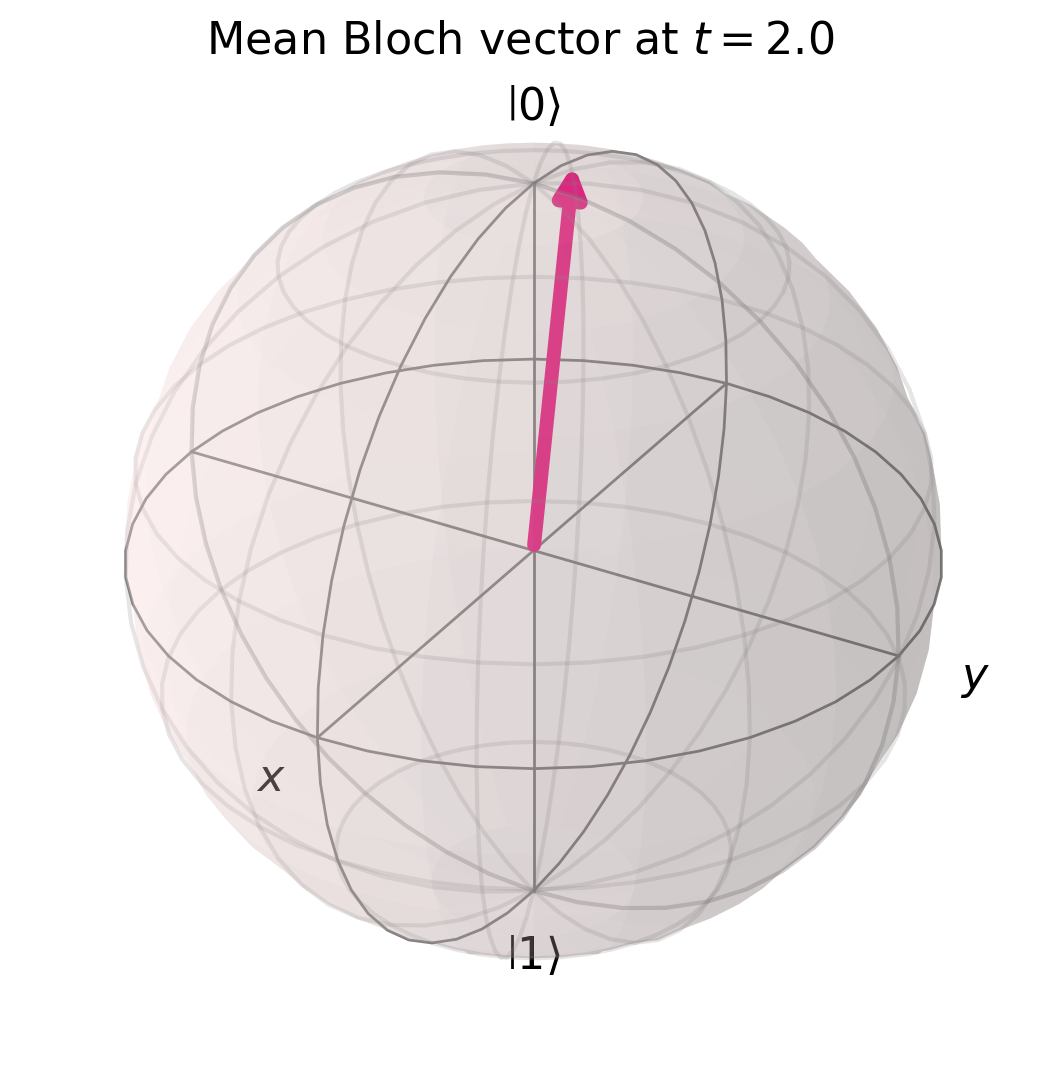

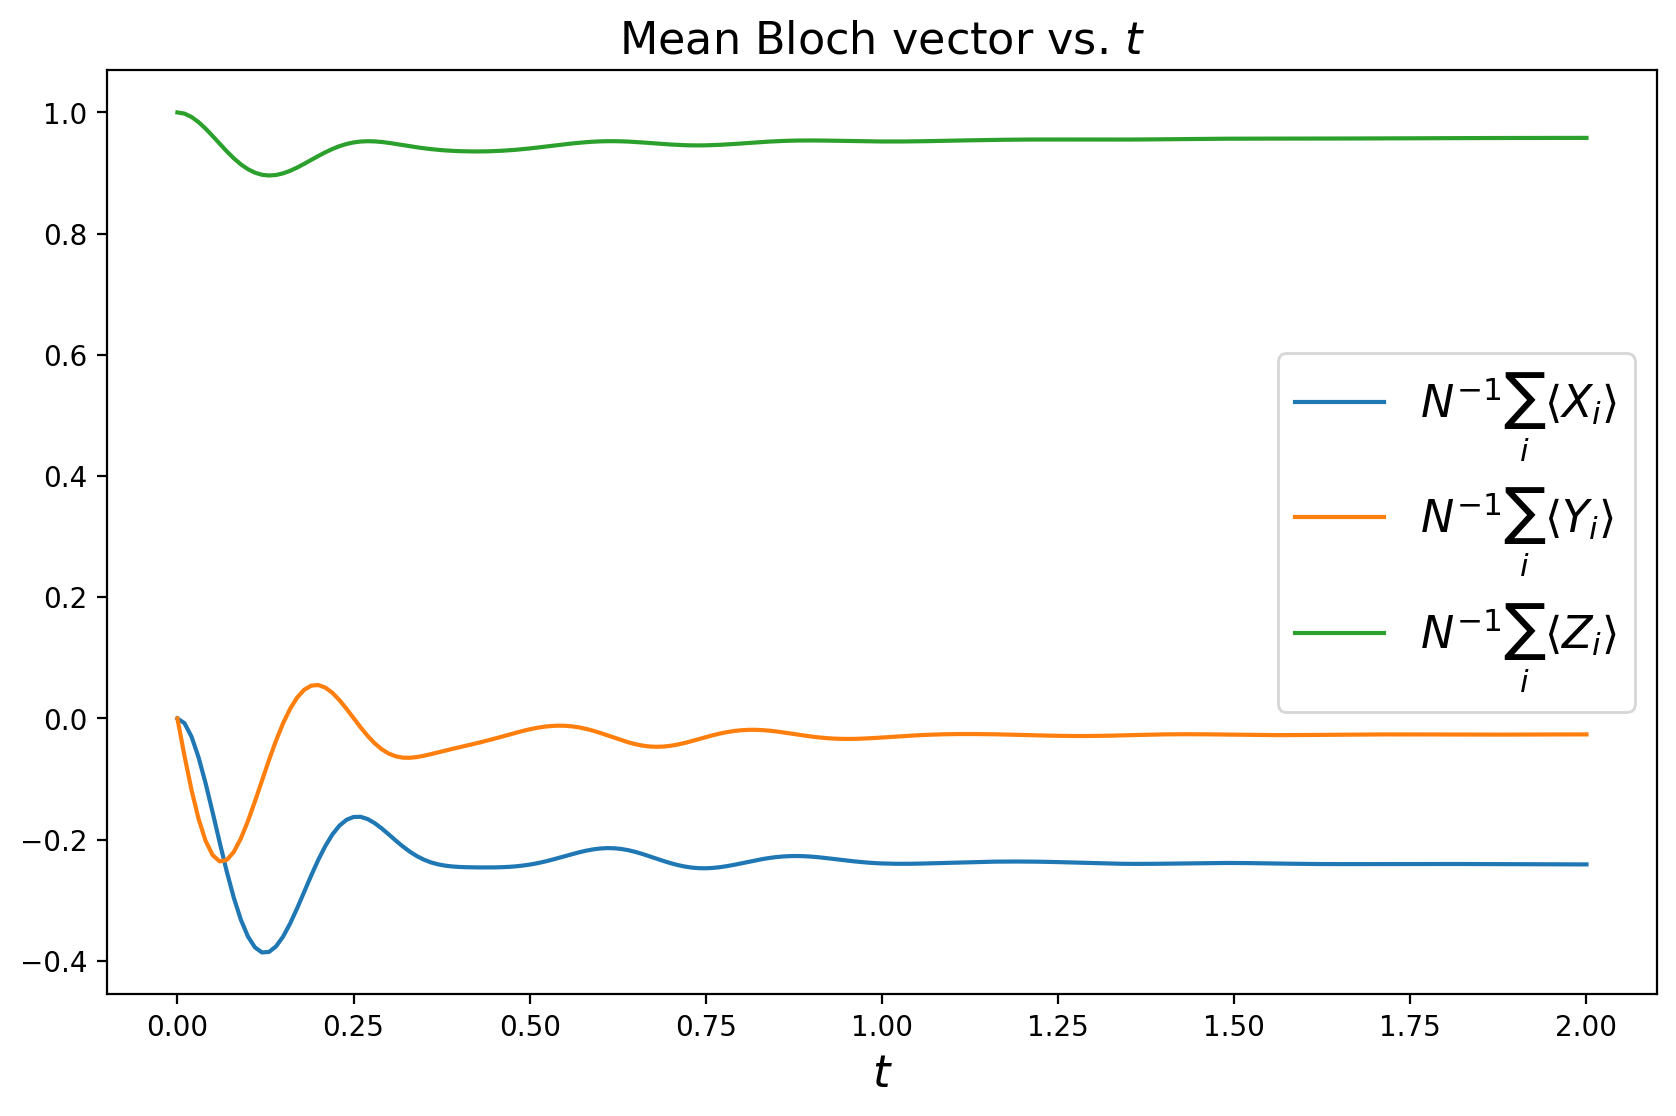

In [ ]:
from qiskit.visualization import plot_bloch_vector
import matplotlib.pyplot as plt
%matplotlib inline

fontsize = 16

_, ax = plt.subplots(figsize = (10, 6))
plt.rcParams.update({'font.size': fontsize})
plt.plot(t_eval, x_mean, label = '$ N^{-1}\sum_i \\langle X_i \\rangle$')
plt.plot(t_eval, y_mean, label = '$ N^{-1}\sum_i \\langle Y_i \\rangle$')
plt.plot(t_eval, z_mean, label = '$ N^{-1}\sum_i \\langle Z_i \\rangle$')
plt.legend(fontsize = fontsize)
ax.set_xlabel('$t$', fontsize = fontsize)
ax.set_title('Mean Bloch vector vs. $t$', fontsize = fontsize)

display(plot_bloch_vector([x_mean[-1], y_mean[-1], z_mean[-1]],
                  f'Mean Bloch vector at $t = {t_eval[-1]}$'))

if N > 1 and ((abs(x_mean[-1]) > 1e-5 and abs(x_data[0, -1] / x_mean[-1] - 1) > 1e-5 or
              (abs(z_mean[-1]) > 1e-5 and abs(z_data[1, -1] / z_mean[-1] - 1) > 1e-5))):
    print("The solution at the final time appears to break translation invariance. "
          "The precision of the simulation should be examined.")

$\left(\begin{array}[cc] \\ \rho(\tau)  \\  \dots \end{array}\right) =
\left(\begin{array}[cc] \\ \mathcal{G'}(\tau) & \mathcal{D_{G'\dagger}}(\tau)  \\  \mathcal{D_{G'}}(\tau) & -\mathcal{G'}^\dagger(\tau) \end{array}\right)
 \left(\begin{array}[cc] \\ \rho(0)  \\  0 \end{array}\right)$

$ \rho(\tau) = \mathcal{G'}(\tau) \rho(0)$